# Bagging and Random Forest
Bagging stands for <b>Bootstrap Aggregation</b>. It basically draw N samples with replacement and chooses a better model. In the case of <b>classification</b>, it aggregates predictions through <b>majority voting</b>. In the case of <b>regressions</b>, it aggregates predictions through <b>averaging</b>. 

In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, RandomForestRegressor, VotingRegressor, BaggingRegressor

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error as MSE

sns.set()
%matplotlib inline

### Bagging classifier with Breast-Cancer dataset


In [4]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target 
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

(569, 30) (569,)


In [5]:
# instantiate Deicison tree classifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=.16)

# instantiate a bagging classifier
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

# fit the model
bc.fit(X_train, y_train)

# predict
y_pred = bc.predict(X_test)

print(f'Accuracy score of DecisionTreeClassifier: {accuracy_score(y_test, DecisionTreeClassifier(max_depth=4, min_samples_leaf=.16).fit(X_train, y_train).predict(X_test))}')
print(f'Accuracy score of BaggingClassifier: {accuracy_score(y_test, y_pred)}')

Accuracy score of DecisionTreeClassifier: 0.9005847953216374
Accuracy score of BaggingClassifier: 0.9005847953216374


# Out of Bag Evaluation
During the training stage, Bagging Classifier samples only ~63% of the data. Therefore, there is roughly 37% that the model "skips". Those skipped instances are called Out-of-Bag (OOB) instances. Since they're being overlooked, we can test the model's performance by estimating the performance of the model on such instances. To do so, we simply need to pass "oob_score=True" when instantiating a model. 

In [6]:
# instantiate the base estimator model
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=.16)

# instantiate a bagging model
bagging = BaggingClassifier(base_estimator=dt, n_estimators=200, oob_score=True, n_jobs=-1)

# fit and predict
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

# evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# extract the OOB accuracy score
oob_accuracy = bagging.oob_score_

# print test and OOB accuracy
print(f'Test Accuracy score: {test_accuracy}')
print(f'OOB accuracy: {oob_accuracy}')

Test Accuracy score: 0.9005847953216374
OOB accuracy: 0.914572864321608


# Random Forest
- base estimator: Decision Tree
- each estimator is trained on a different bootstrap sample having the same size as the training set 
- introduces further randomization in the training of individual trees
- splits into samples with features without replacement 
- aggregates predictions by majority voting for classifications, and averaging for regressions



In [7]:
auto_mpg = pd.read_csv('datasets/auto_mpg.csv')
auto_mpg.head(3)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0


In [8]:
auto_mpg = pd.get_dummies(auto_mpg, columns=['origin'], drop_first=True)
auto_mpg.head(3)

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0


In [15]:
X, y = auto_mpg.drop('mpg', axis=1), auto_mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

# instantiate a 
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=.12).fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = MSE(y_test, y_pred)
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')

MSE: 9.678216913022345
RMSE: 3.1109832710932963


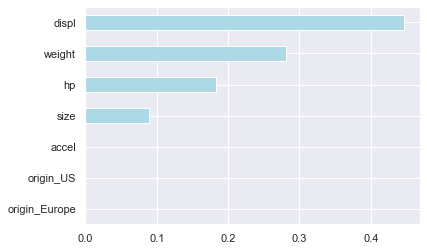

In [16]:
# create a pd.Series of feature importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

# sort importances
sorted_importances = importances_rf.sort_values()

# make a horizontal bar plot
sorted_importances.plot(kind='barh', color='lightblue')
plt.show()